In [7]:
import pandas as pd
import numpy as np
ruta='/content/drive/MyDrive/Ingeniería y Ciencia de Datos/Segundo Semestre/Ingeniería de Características/Colab Notebooks/'
data=pd.read_csv(ruta+'temps.txt',sep='\s+',header=None) # Fuente: http://astro.iam.udg.mx/Estacion/NOAAPRMO.TXT
                                                         #         http://astro.iam.udg.mx/Estacion/NOAAMO.TXT
data.columns=['Temperatura máxima','Temperatura mínima','HDD','CDD','Rain']
d=['Sábado','Domingo','Lunes','Martes','Miércoles','Jueves','Viernes']
dias=[d[i%7] for i in range(len(data))]
catego=['Soleado','Mayormente soleado','Parcialmente nublado','Mayormente nublado','Nublado','Lluvioso']
prono=[catego[-1] if data['Rain'][i]>0 else catego[int(round(1.2*(data['HDD'][i]-data['CDD'][i])+2))] for i in range(len(data))]
df=pd.DataFrame(columns=['Días','Pronóstico','Temperatura máxima','Temperatura mínima'],index=range(len(data)))
df.iloc[:,2:4]=data.iloc[:,0:2]
df['Días']=dias
df['Pronóstico']=prono
df.head()

,Días,Pronóstico,Temperatura máxima,Temperatura mínima
0,Sábado,Parcialmente nublado,28.2,11.2
1,Domingo,Parcialmente nublado,29.1,10.7
2,Lunes,Mayormente nublado,26.1,10.4
3,Martes,Mayormente soleado,29.4,11.1
4,Miércoles,Mayormente soleado,29.8,11.1


In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Codificación lineal

In [9]:
#@title Variable `Días`
#
df['Días'].unique()

array(['Sábado', 'Domingo', 'Lunes', 'Martes', 'Miércoles', 'Jueves',
       'Viernes'], dtype=object)

In [10]:
var_ordenada=np.concatenate([df['Días'].unique()[2:],df['Días'].unique()[:2]])
var_ordenada

array(['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado',
       'Domingo'], dtype=object)

In [11]:
n=len(var_ordenada)
n # cardinalidad impar

7

In [12]:
(n-1)/2

3.0

In [13]:
X=range(-(n-1)//2,(n-1)//2+1)
list(X)

[-3, -2, -1, 0, 1, 2, 3]

In [14]:
# Codificación de la variable 'Días'
a0=0
a1=1 # a1>0  ->  codificación creciente
Y=[a0+a1*x for x in X]

Dias_lin={categoria:codificacion for categoria,codificacion in zip(var_ordenada,Y)}
Dias_lin

{'Lunes': -3,
 'Martes': -2,
 'Miércoles': -1,
 'Jueves': 0,
 'Viernes': 1,
 'Sábado': 2,
 'Domingo': 3}

In [15]:
df['Días_lin']=df['Días'].map(Dias_lin)
df.head()

,Días,Pronóstico,Temperatura máxima,Temperatura mínima,Días_lin
0,Sábado,Parcialmente nublado,28.2,11.2,2
1,Domingo,Parcialmente nublado,29.1,10.7,3
2,Lunes,Mayormente nublado,26.1,10.4,-3
3,Martes,Mayormente soleado,29.4,11.1,-2
4,Miércoles,Mayormente soleado,29.8,11.1,-1


In [16]:
#@title Variable `Pronóstico`
#
df['Pronóstico'].unique()

array(['Parcialmente nublado', 'Mayormente nublado', 'Mayormente soleado',
       'Soleado', 'Lluvioso', 'Nublado'], dtype=object)

In [17]:
p_unique=df['Pronóstico'].unique()
pronostico_ordenado=[p_unique[3],p_unique[2],p_unique[0],p_unique[-1],p_unique[1],p_unique[-2]]
pronostico_ordenado

['Soleado',
 'Mayormente soleado',
 'Parcialmente nublado',
 'Nublado',
 'Mayormente nublado',
 'Lluvioso']

In [18]:
n=len(pronostico_ordenado)
Lim=n-1 if n%2==0 else (n-1)//2
step=2 if n%2==0 else 1

X=range(-Lim,Lim+1,step)
list(X)

[-5, -3, -1, 1, 3, 5]

In [19]:
a0=0
a1=1 # Codificación creciente
Y=[a0+a1*x for x in X] # Valores ordenados para la codificación
Y

[-5, -3, -1, 1, 3, 5]

In [20]:
np.sum(Y)

0

In [21]:
pronostico_lin={categoria:y for categoria,y in zip(pronostico_ordenado,Y)}
pronostico_lin

{'Soleado': -5,
 'Mayormente soleado': -3,
 'Parcialmente nublado': -1,
 'Nublado': 1,
 'Mayormente nublado': 3,
 'Lluvioso': 5}

In [22]:
df['Pronóstico_lin']=df['Pronóstico'].map(pronostico_lin)
df.head()

,Días,Pronóstico,Temperatura máxima,Temperatura mínima,Días_lin,Pronóstico_lin
0,Sábado,Parcialmente nublado,28.2,11.2,2,-1
1,Domingo,Parcialmente nublado,29.1,10.7,3,-1
2,Lunes,Mayormente nublado,26.1,10.4,-3,3
3,Martes,Mayormente soleado,29.4,11.1,-2,-3
4,Miércoles,Mayormente soleado,29.8,11.1,-1,-3


## Codificación cuadrática

In [25]:
var_ordenada

array(['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado',
       'Domingo'], dtype=object)

In [23]:
import matplotlib.pyplot as plt

In [26]:
n=len(var_ordenada)
Lim = n-1 if n%2==0 else (n-1)//2
step=2 if n%2==0 else 1
X=range(-Lim,Lim+1,step)
list(X)

[-3, -2, -1, 0, 1, 2, 3]

In [33]:
a2=-1 # Parábola cóncava
a1=1
a0=-a2*np.sum([x**2 for x in X])/n
Y=[a0+a1*x+a2*x**2 for x in X]
np.sum(Y)

0.0

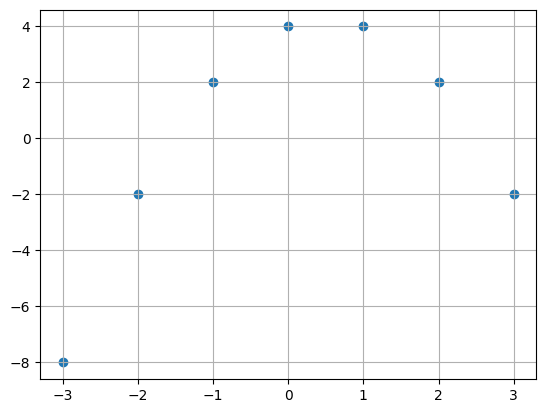

In [34]:
plt.scatter(X,Y)
plt.grid()

In [35]:
dias_cuad={categoria:y for categoria,y in zip(var_ordenada,Y)}
dias_cuad

{'Lunes': -8.0,
 'Martes': -2.0,
 'Miércoles': 2.0,
 'Jueves': 4.0,
 'Viernes': 4.0,
 'Sábado': 2.0,
 'Domingo': -2.0}

## Variable pronóstico

In [37]:
pronostico_ordenado

['Soleado',
 'Mayormente soleado',
 'Parcialmente nublado',
 'Nublado',
 'Mayormente nublado',
 'Lluvioso']

In [42]:
n=len(pronostico_ordenado)
Lim=n-1 if n%2==0 else (n-1)//2
step=2 if n%2==0 else 1
X=range(-Lim,Lim+1,step)
list(X)

[-5, -3, -1, 1, 3, 5]

7.105427357601002e-15

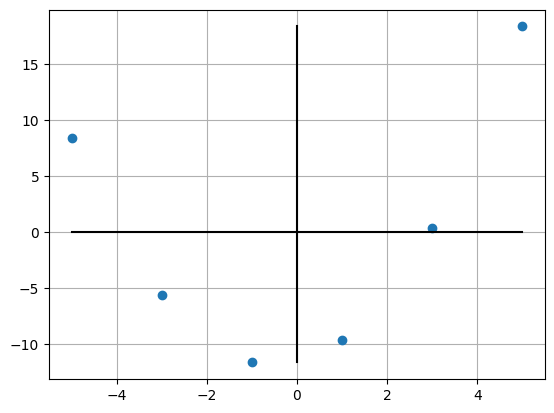

In [43]:
a2=1 # a2>0  ->  parábola cóncava, a2<0  ->  parábola convexa
a1=1 # puede ser cualquier valor
a0=-a2*np.sum([x**2 for x in X])/n
Y=[a0+a1*x+a2*x**2 for x in X]
plt.plot(X,Y,'o',[-Lim,Lim],[0,0],'k',[0,0],[min(Y),max(Y)],'k')
plt.grid()
np.sum(Y)

In [44]:
pronostico_cuad={categoria:y for categoria,y in zip(pronostico_ordenado,Y)}
pronostico_cuad

{'Soleado': 8.333333333333336,
 'Mayormente soleado': -5.666666666666666,
 'Parcialmente nublado': -11.666666666666666,
 'Nublado': -9.666666666666666,
 'Mayormente nublado': 0.3333333333333339,
 'Lluvioso': 18.333333333333336}

In [45]:
df['Pronóstico_cuad']=df['Pronóstico'].map(pronostico_cuad)
df.head()

,Días,Pronóstico,Temperatura máxima,Temperatura mínima,Días_lin,Pronóstico_lin,Pronóstico_cuad
0,Sábado,Parcialmente nublado,28.2,11.2,2,-1,-11.666667
1,Domingo,Parcialmente nublado,29.1,10.7,3,-1,-11.666667
2,Lunes,Mayormente nublado,26.1,10.4,-3,3,0.333333
3,Martes,Mayormente soleado,29.4,11.1,-2,-3,-5.666667
4,Miércoles,Mayormente soleado,29.8,11.1,-1,-3,-5.666667


# Regresión

In [46]:
from sklearn.linear_model import LinearRegression

In [48]:
reg_lin=LinearRegression()
reg_cuad=LinearRegression()
reg_linCuad=LinearRegression()

#Pronósitico vs temperatura mínima
#Entrenamiento de reg_lin
reg_lin.fit(df[['Pronóstico_lin']],df['Temperatura mínima'])

#Entrenamiento de reg_cuad
reg_cuad.fit(df[['Pronóstico_cuad']],df['Temperatura mínima'])

LinearRegression()

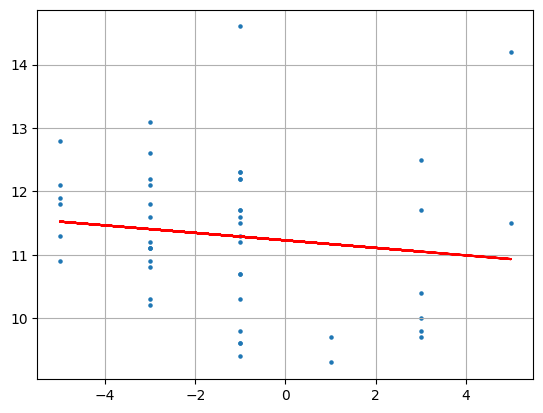

In [50]:
#Visualización
plt.scatter(df['Pronóstico_lin'],df['Temperatura mínima'],s=5)
plt.plot(df['Pronóstico_lin'],reg_lin.predict(df[['Pronóstico_lin']]),'r')
plt.grid()

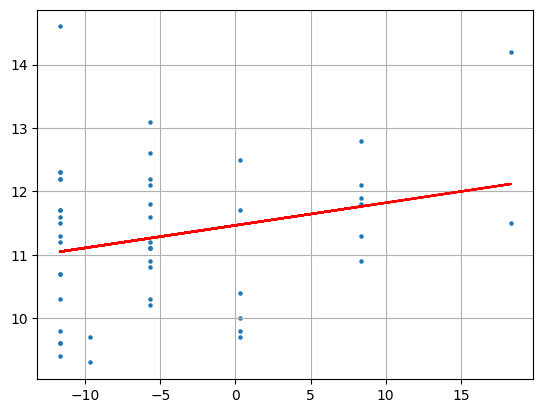

In [52]:
plt.scatter(df['Pronóstico_cuad'],df['Temperatura mínima'],s=5)
plt.plot(df['Pronóstico_cuad'],reg_cuad.predict(df[['Pronóstico_cuad']]),'r')
plt.grid()

# Normalización

In [53]:
pronostico_lin
pronostico_cuad

{'Soleado': 8.333333333333336,
 'Mayormente soleado': -5.666666666666666,
 'Parcialmente nublado': -11.666666666666666,
 'Nublado': -9.666666666666666,
 'Mayormente nublado': 0.3333333333333339,
 'Lluvioso': 18.333333333333336}

In [54]:
np.linalg.norm(list(pronostico_lin.values()))

8.366600265340756

In [55]:
np.linalg.norm(list(pronostico_cuad.values()))

25.832795693330084

In [56]:
NormaLin=np.linalg.norm(list(pronostico_lin.values()))
pronostico_linN={categoria:val/NormaLin for categoria,val in pronostico_lin.items()}
np.linalg.norm(list(pronostico_linN.values()))

0.9999999999999999

In [60]:
NormaCuad=np.linalg.norm(list(pronostico_cuad.values()))
pronostico_cuadN={categoria:val/NormaCuad for categoria,val in pronostico_cuad.items()}
np.linalg.norm(list(pronostico_cuadN.values()))

1.0

In [61]:
df['Pronóstico_LinN']=df['Pronóstico'].map(pronostico_linN)
df['Pronóstico_CuadN']=df['Pronóstico'].map(pronostico_cuadN)

In [62]:
# Entrenamiento de reg_linCuad
reg_linCuad.fit(df[['Pronóstico_LinN','Pronóstico_CuadN']],df['Temperatura mínima'])

LinearRegression()

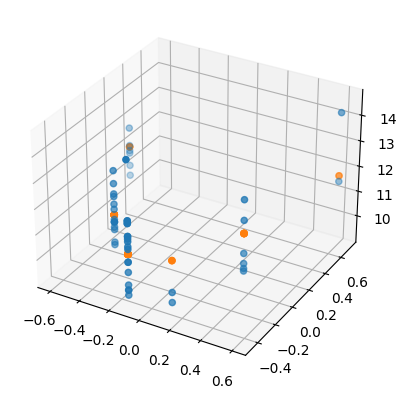

In [64]:
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.scatter(df['Pronóstico_LinN'],df['Pronóstico_CuadN'],df['Temperatura mínima'],label='Datos')
prediccion=reg_linCuad.predict(df[['Pronóstico_LinN','Pronóstico_CuadN']])
ax.scatter(df['Pronóstico_LinN'],df['Pronóstico_CuadN'],prediccion,label='Regression')